In [1]:
import pandas as pd

from scripts.helper.main_pipeline_helper import (
    ensure_train_features_npz,
    ensure_test_features_npz,
    compute_pca_for_feature,
)

from scripts.dataset.unpack_root_dataset import main_unpack
from scripts.dataset.create_splits import create_splits, convert_class_name_to_index
from scripts.scaler import rescale_all_images, INPUT_DIR
from scripts.hog.hog import HOGTransformer
from scripts.lbp.lbp import LBPTransformer
from scripts.orb.orb import ORBTransformer
from scripts.sift.sift import SIFTTransformer

from scripts.classifiers.svm import SVMClassifier
from scripts.classifiers.random_forests import RandomForestClassifier
# from scripts.classifiers.logreg_orv import OVRLogRegClassifier

from scripts.classifiers.metrics import calculate_metrics, plot_confusion_matrix

FORCE_REEXTRACT = True


In [2]:
main_unpack()
create_splits()


1) Unpacking main ZIP: C:\Users\Filip\Documents\studia-local\animals-recognition\Wild Animal Facing Extinction.zip
2) Unpacking nested ZIP: C:\Users\Filip\AppData\Local\Temp\unpack_dataset_gv71y6s3\Wild Animal Facing Extinction\Wild Animals Facing Extinction with Rhino Skeleton.zip
3) Processing extracted content
   Found main folder: Wild Animals Facing Extinction with Rhino Skeleton
   Removing: Rhino Skeleton/
   Processing: Wild Animals Boundary Box labels/
     → images/
     → labels/
4) Processing images directory
   → Moved train/ to dataset root
   → Moved test/ to dataset root
   → Moved valid/ to dataset root
5) Cleaning up dataset directory
   Removing: images/
   Removing: labels/
Processed 5 directories. Dataset structure cleaned up.
4) Removing wrapper folder: C:\Users\Filip\AppData\Local\Temp\unpack_dataset_gv71y6s3\Wild Animal Facing Extinction

✓ Done!
Split train - Class cheetah: 908 images -> train.csv
Split train - Class elephant: 1032 images -> train.csv
Split tra

In [3]:
rescale_all_images()


Rescaling all images...
Processing train set...
Processing test set...
Rescaling completed.


In [4]:
hog_transformer = HOGTransformer(visualize=False)
lbp_transformer = LBPTransformer(visualize=False)
orb_transformer = ORBTransformer(visualize=False)
sift_transformer = SIFTTransformer(visualize=False)


In [5]:
data_train = pd.read_csv(f'{INPUT_DIR}/train.csv')
y_train = list(map(convert_class_name_to_index, data_train['class'].tolist()))

data_test = pd.read_csv(f'{INPUT_DIR}/test.csv')
y_test = list(map(convert_class_name_to_index, data_test['class'].tolist()))


In [6]:
hog_train_npz = ensure_train_features_npz(
    transformer=hog_transformer,
    name="HOG",
    dataset_dir=INPUT_DIR,
    train_df=data_train,
    features_output_dir="output/hog/features/train",
    npz_filename="hog_features.npz",
    force_reextract=FORCE_REEXTRACT,
)


[HOG] Extracting train features...
Found 6107 images in 'train' split.


Extracting HOG features: 100%|██████████████████████████████| 6107/6107 [03:08<00:00, 32.35img/s] 



Saved HOG features to output\hog\features\train\hog_features.npz
Saved feature info to output\hog\features\train\hog_info.txt


In [7]:
lbp_train_npz = ensure_train_features_npz(
    transformer=lbp_transformer,
    name="LBP",
    dataset_dir=INPUT_DIR,
    train_df=data_train,
    features_output_dir="output/lbp/features/train",
    npz_filename="lbp_features.npz",
    force_reextract=FORCE_REEXTRACT,
)


[LBP] Extracting train features...
Found 6107 images in split 'train'


Extracting LBP: 100%|██████████| 6107/6107 [04:19<00:00, 23.54img/s] 



Saved LBP features to output\lbp\features\train\lbp_features.npz
Saved info to output\lbp\features\train\lbp_info.txt


In [8]:
orb_train_npz = ensure_train_features_npz(
    transformer=orb_transformer,
    name="ORB",
    dataset_dir=INPUT_DIR,
    train_df=data_train,
    features_output_dir="output/orb/features/train",
    npz_filename="orb_features.npz",
    force_reextract=FORCE_REEXTRACT,
)


[ORB] Extracting train features...
Found 6107 images in 'train' split


Extracting ORB features: 100%|██████████████████████████████| 6107/6107 [02:41<00:00, 37.85img/s] 



Saved ORB features to output\orb\features\train\orb_features.npz
Saved feature info to output\orb\features\train\orb_info.txt


In [9]:
sift_train_npz = ensure_train_features_npz(
    transformer=sift_transformer,
    name="SIFT",
    dataset_dir=INPUT_DIR,
    train_df=data_train,
    features_output_dir="output/sift/features/train",
    npz_filename="sift_features.npz",
    force_reextract=FORCE_REEXTRACT,
)


[SIFT] Extracting train features...


Extracting SIFT: 100%|██████████| 6107/6107 [03:20<00:00, 30.49img/s] 



Saved SIFT features to output\sift\features\train\sift_features.npz
Vector length: 64000


In [10]:
hog_test_npz = ensure_test_features_npz(
    transformer=hog_transformer,
    name="HOG",
    dataset_dir=INPUT_DIR,
    test_df=data_test,
    features_output_dir="output/hog/features/test",
    npz_filename="hog_features.npz",
    force_reextract=FORCE_REEXTRACT,
)


[HOG] Extracting test features from splits: ('test', 'valid') ...
Found 764 images in 'test' split.


Extracting HOG features: 100%|██████████████████████████████| 764/764 [00:22<00:00, 33.41img/s]


Found 763 images in 'valid' split.


Extracting HOG features: 100%|██████████████████████████████| 763/763 [00:20<00:00, 37.13img/s]


[HOG] Saved combined test features to output\hog\features\test\hog_features.npz


In [11]:
lbp_test_npz = ensure_test_features_npz(
    transformer=lbp_transformer,
    name="LBP",
    dataset_dir=INPUT_DIR,
    test_df=data_test,
    features_output_dir="output/lbp/features/test",
    npz_filename="lbp_features.npz",
    force_reextract=FORCE_REEXTRACT,
)


[LBP] Extracting test features from splits: ('test', 'valid') ...
Found 764 images in split 'test'


Extracting LBP: 100%|██████████| 764/764 [00:31<00:00, 23.96img/s]


Found 763 images in split 'valid'


Extracting LBP: 100%|██████████| 763/763 [00:29<00:00, 25.92img/s]

[LBP] Saved combined test features to output\lbp\features\test\lbp_features.npz


In [12]:
orb_test_npz = ensure_test_features_npz(
    transformer=orb_transformer,
    name="ORB",
    dataset_dir=INPUT_DIR,
    test_df=data_test,
    features_output_dir="output/orb/features/test",
    npz_filename="orb_features.npz",
    force_reextract=FORCE_REEXTRACT,
)


[ORB] Extracting test features from splits: ('test', 'valid') ...
Found 764 images in 'test' split


Extracting ORB features: 100%|██████████████████████████████| 764/764 [00:19<00:00, 39.36img/s]


Found 763 images in 'valid' split


Extracting ORB features: 100%|██████████████████████████████| 763/763 [00:17<00:00, 44.88img/s]


[ORB] Saved combined test features to output\orb\features\test\orb_features.npz


In [13]:
sift_test_npz = ensure_test_features_npz(
    transformer=sift_transformer,
    name="SIFT",
    dataset_dir=INPUT_DIR,
    test_df=data_test,
    features_output_dir="output/sift/features/test",
    npz_filename="sift_features.npz",
    force_reextract=FORCE_REEXTRACT,
)


[SIFT] Extracting test features from splits: ('test', 'valid') ...


Extracting SIFT: 100%|██████████| 763/763 [00:22<00:00, 34.20img/s]


[SIFT] Saved combined test features to output\sift\features\test\sift_features.npz


In [14]:
x_hog_train, x_hog_test = compute_pca_for_feature(
    name="HOG",
    train_npz_path=hog_train_npz,
    test_npz_path=hog_test_npz,
    train_df=data_train,
    test_df=data_test,
)

x_lbp_train, x_lbp_test = compute_pca_for_feature(
    name="LBP",
    train_npz_path=lbp_train_npz,
    test_npz_path=lbp_test_npz,
    train_df=data_train,
    test_df=data_test,
)

x_orb_train, x_orb_test = compute_pca_for_feature(
    name="ORB",
    train_npz_path=orb_train_npz,
    test_npz_path=orb_test_npz,
    train_df=data_train,
    test_df=data_test,
)

x_sift_train, x_sift_test = compute_pca_for_feature(
    name="SIFT",
    train_npz_path=sift_train_npz,
    test_npz_path=sift_test_npz,
    train_df=data_train,
    test_df=data_test,
)



=== PCA: HOG ===
[HOG] Train shape: (6107, 8100), Test shape: (1527, 8100)

=== PCA: LBP ===
[LBP] Train shape: (6107, 26), Test shape: (1527, 26)

=== PCA: ORB ===
[ORB] Train shape: (6107, 16000), Test shape: (1527, 16000)

=== PCA: SIFT ===
[SIFT] Train shape: (6107, 64000), Test shape: (1527, 64000)


In [15]:
# HOG + SVM
svm_hog_classifier = SVMClassifier()
svm_hog_classifier.fit(x_hog_train, y_train)
y_hog_svm_pred = svm_hog_classifier.predict(x_hog_test)

# LBP + SVM
svm_lbp_classifier = SVMClassifier()
svm_lbp_classifier.fit(x_lbp_train, y_train)
y_lbp_svm_pred = svm_lbp_classifier.predict(x_lbp_test)

# ORB + SVM
svm_orb_classifier = SVMClassifier()
svm_orb_classifier.fit(x_orb_train, y_train)
y_orb_svm_pred = svm_orb_classifier.predict(x_orb_test)

# SIFT + SVM
svm_sift_classifier = SVMClassifier()
svm_sift_classifier.fit(x_sift_train, y_train)
y_sift_svm_pred = svm_sift_classifier.predict(x_sift_test)


In [16]:
# HOG + RF
rf_hog_classifier = RandomForestClassifier()
rf_hog_classifier.fit(x_hog_train, y_train)
y_hog_rf_pred = rf_hog_classifier.predict(x_hog_test)

# LBP + RF
rf_lbp_classifier = RandomForestClassifier()
rf_lbp_classifier.fit(x_lbp_train, y_train)
y_lbp_rf_pred = rf_lbp_classifier.predict(x_lbp_test)

# ORB + RF
rf_orb_classifier = RandomForestClassifier()
rf_orb_classifier.fit(x_orb_train, y_train)
y_orb_rf_pred = rf_orb_classifier.predict(x_orb_test)

# SIFT + RF
rf_sift_classifier = RandomForestClassifier()
rf_sift_classifier.fit(x_sift_train, y_train)
y_sift_rf_pred = rf_sift_classifier.predict(x_sift_test)


In [17]:
# # HOG + LogReg OVR
# logreg_hog_classifier = OVRLogRegClassifier()
# logreg_hog_classifier.fit(x_hog_train, y_train)
# y_hog_logreg_pred = logreg_hog_classifier.predict(x_hog_test)
#
# # LBP + LogReg OVR
# logreg_lbp_classifier = OVRLogRegClassifier()
# logreg_lbp_classifier.fit(x_lbp_train, y_train)
# y_lbp_logreg_pred = logreg_lbp_classifier.predict(x_lbp_test)
#
# # ORB + LogReg OVR
# logreg_orb_classifier = OVRLogRegClassifier()
# logreg_orb_classifier.fit(x_orb_train, y_train)
# y_orb_logreg_pred = logreg_orb_classifier.predict(x_orb_test)
#
# # SIFT + LogReg OVR
# logreg_sift_classifier = OVRLogRegClassifier()
# logreg_sift_classifier.fit(x_sift_train, y_train)
# y_sift_logreg_pred = logreg_sift_classifier.predict(x_sift_test)



Metrics for HOG + SVM
Accuracy        : 0.5855
Precision (macro): 0.5928
Recall (macro)   : 0.5902
Specificity      : 0.9172
F1-score (macro) : 0.5859
Balanced accuracy: 0.5902
Plotting confusion matrix...


<Figure size 600x600 with 0 Axes>

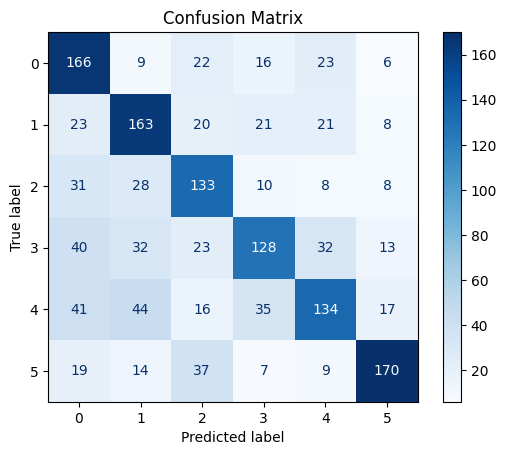


Metrics for LBP + SVM
Accuracy        : 0.3988
Precision (macro): 0.3901
Recall (macro)   : 0.4030
Specificity      : 0.8799
F1-score (macro) : 0.3827
Balanced accuracy: 0.4030
Plotting confusion matrix...


<Figure size 600x600 with 0 Axes>

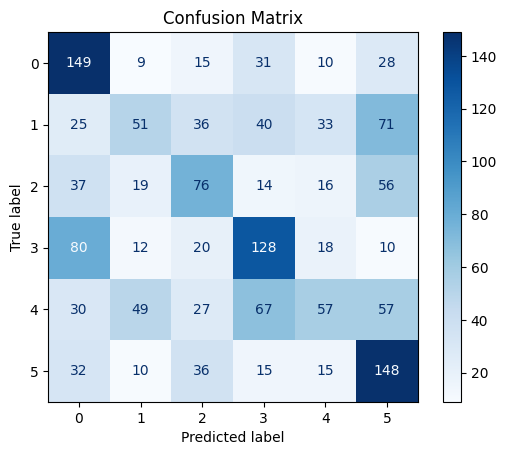


Metrics for ORB + SVM
Accuracy        : 0.3320
Precision (macro): 0.3688
Recall (macro)   : 0.3402
Specificity      : 0.8673
F1-score (macro) : 0.3160
Balanced accuracy: 0.3402
Plotting confusion matrix...


<Figure size 600x600 with 0 Axes>

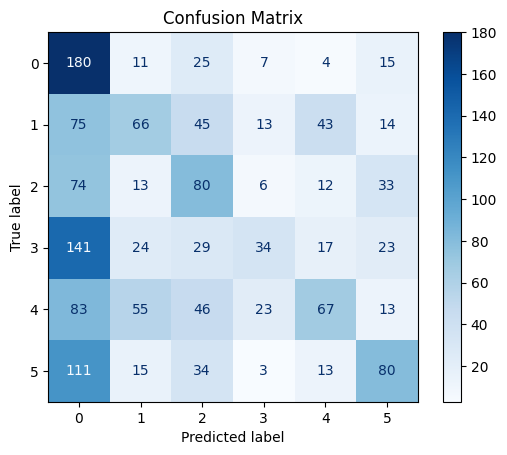


Metrics for SIFT + SVM
Accuracy        : 0.4106
Precision (macro): 0.4085
Recall (macro)   : 0.4138
Specificity      : 0.8820
F1-score (macro) : 0.3789
Balanced accuracy: 0.4138
Plotting confusion matrix...


<Figure size 600x600 with 0 Axes>

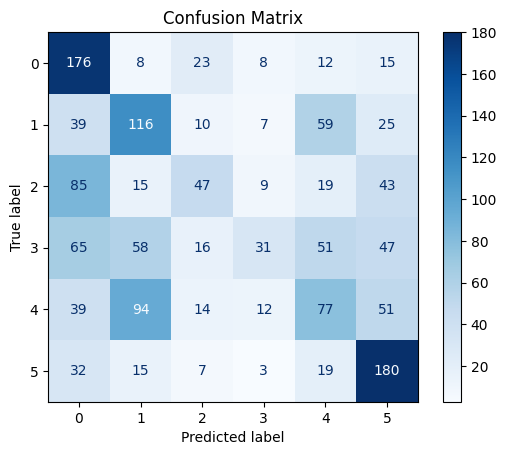


Metrics for HOG + RF
Accuracy        : 0.3988
Precision (macro): 0.4047
Recall (macro)   : 0.3986
Specificity      : 0.8795
F1-score (macro) : 0.4001
Balanced accuracy: 0.3986
Plotting confusion matrix...


<Figure size 600x600 with 0 Axes>

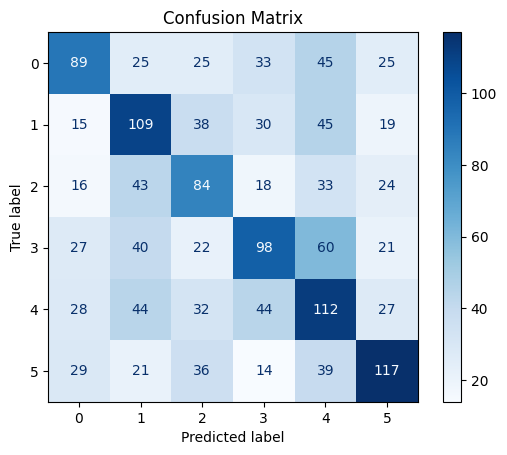


Metrics for LBP + RF
Accuracy        : 0.4060
Precision (macro): 0.4027
Recall (macro)   : 0.4068
Specificity      : 0.8810
F1-score (macro) : 0.4036
Balanced accuracy: 0.4068
Plotting confusion matrix...


<Figure size 600x600 with 0 Axes>

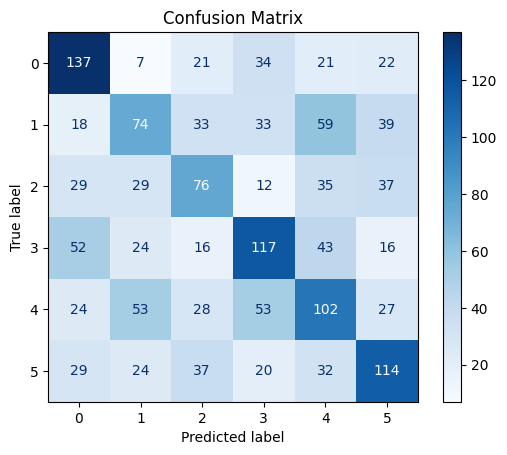


Metrics for ORB + RF
Accuracy        : 0.2986
Precision (macro): 0.2987
Recall (macro)   : 0.2985
Specificity      : 0.8594
F1-score (macro) : 0.2949
Balanced accuracy: 0.2985
Plotting confusion matrix...


<Figure size 600x600 with 0 Axes>

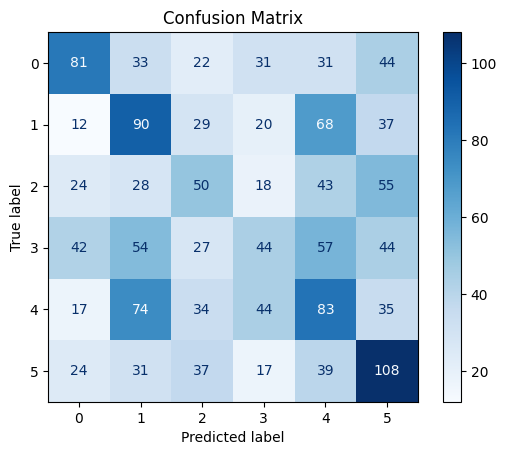


Metrics for SIFT + RF
Accuracy        : 0.3707
Precision (macro): 0.3841
Recall (macro)   : 0.3673
Specificity      : 0.8732
F1-score (macro) : 0.3579
Balanced accuracy: 0.3673
Plotting confusion matrix...


<Figure size 600x600 with 0 Axes>

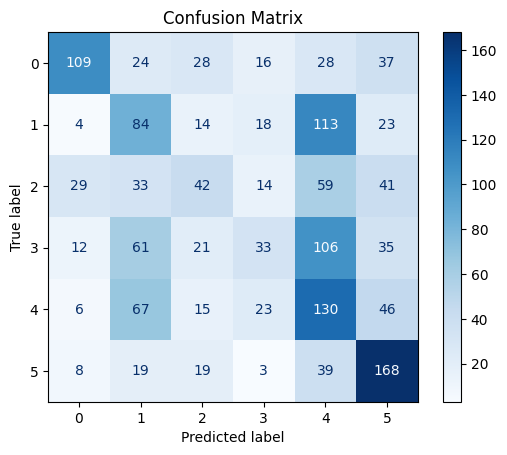

In [18]:
PLOT_CONF_MATRICES = True

results = {
    # SVM
    ("HOG",  "SVM"): y_hog_svm_pred,
    ("LBP",  "SVM"): y_lbp_svm_pred,
    ("ORB",  "SVM"): y_orb_svm_pred,
    ("SIFT", "SVM"): y_sift_svm_pred,

    # Random Forest
    ("HOG",  "RF"): y_hog_rf_pred,
    ("LBP",  "RF"): y_lbp_rf_pred,
    ("ORB",  "RF"): y_orb_rf_pred,
    ("SIFT", "RF"): y_sift_rf_pred,

    # # OVR Logistic Regression
    # ("HOG",  "LogReg-OVR"): y_hog_logreg_pred,
    # ("LBP",  "LogReg-OVR"): y_lbp_logreg_pred,
    # ("ORB",  "LogReg-OVR"): y_orb_logreg_pred,
    # ("SIFT", "LogReg-OVR"): y_sift_logreg_pred,
}

for (feature_name, clf_name), y_pred in results.items():
    print("\n" + "=" * 60)
    print(f"Metrics for {feature_name} + {clf_name}")
    print("=" * 60)

    accuracy, precision, recall, specificity, f1, balanced_acc = calculate_metrics(y_test, y_pred)

    print(f"Accuracy        : {accuracy:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro)   : {recall:.4f}")
    print(f"Specificity      : {specificity:.4f}")
    print(f"F1-score (macro) : {f1:.4f}")
    print(f"Balanced accuracy: {balanced_acc:.4f}")

    if PLOT_CONF_MATRICES:
        print("Plotting confusion matrix...")
        plot_confusion_matrix(y_test, y_pred)
